In [2]:
import pandas as pd

In [3]:
#Importing data
ndvi_data = pd.read_csv('../data/ndvi_results/ndvi_dataframe.csv')
ndvi_data.head()

,Folder,Average_NDVI
0,LC08_L2SP_141054_20200614_20200824_02_T1_replaced,0.360737
1,LC08_L2SP_141054_20200716_20200912_02_T1_replaced,0.285380
2,LC08_L2SP_141054_20200817_20200920_02_T1_replaced,0.274822
3,LC08_L2SP_141054_20200918_20201005_02_T1_replaced,0.267578
4,LC08_L2SP_141054_20201004_20201015_02_T1_replaced,0.277103


In [4]:
#dimensions
ndvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Folder        38 non-null     object 
 1   Average_NDVI  38 non-null     float64
dtypes: float64(1), object(1)
memory usage: 736.0+ bytes


In [5]:
#missing values
print("Number of Missing Values in each column : ")
print(ndvi_data.isna().sum())

Number of Missing Values in each column : 
Folder          0
Average_NDVI    0
dtype: int64


### Data Preprocessing

In [6]:
# Extracting the two dates
ndvi_data['Date'] = ndvi_data['Folder'].str.extract('(\d{8})_')
position = ndvi_data.columns.get_loc('Folder')
ndvi_data.insert(position + 1, 'Date', ndvi_data.pop('Date'))

In [7]:
# Convert 'Date' to datetime
ndvi_data['Date'] = pd.to_datetime(ndvi_data['Date'])

In [8]:
#drop 'Folder' column
ndvi_data = ndvi_data.drop('Folder', axis=1)


In [9]:
ndvi_data = ndvi_data.sort_values(by='Date')

In [10]:
def label_ndvi(average_ndvi):
    if average_ndvi > 0.3:
        return 'Forest'
    else:
        return 'Deforest'

ndvi_data['Label'] = ndvi_data['Average_NDVI'].apply(label_ndvi)

In [11]:
ndvi_data

,Date,Average_NDVI,Label
0,2020-06-14,0.360737,Forest
1,2020-07-16,0.285380,Deforest
2,2020-08-17,0.274822,Deforest
3,2020-09-18,0.267578,Deforest
4,2020-10-04,0.277103,Deforest
5,2020-11-21,0.206177,Deforest
6,2020-12-07,0.294097,Deforest
7,2021-01-24,0.295436,Deforest
8,2021-02-09,0.286286,Deforest
9,2021-03-29,0.304212,Forest


In [12]:
ndvi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          38 non-null     datetime64[ns]
 1   Average_NDVI  38 non-null     float64       
 2   Label         38 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ KB


### EDA

In [13]:
import plotly.express as px
import pandas as pd


#time-series plot
fig = px.line(ndvi_data, x='Date', y='Average_NDVI', title='Avearage NDVI Distribution')

# Show the plot
fig.show()


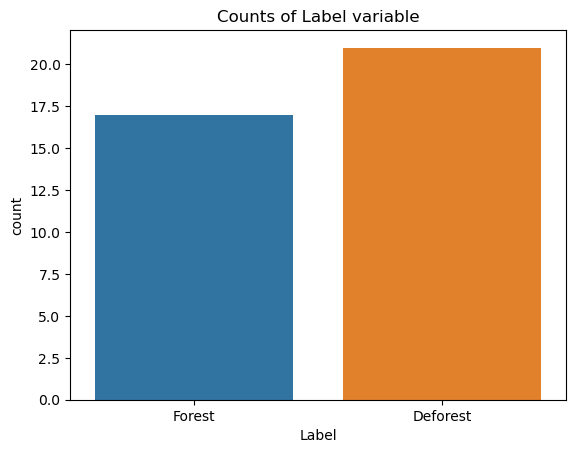

In [15]:
#count of the response variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Label',data = ndvi_data)
plt.title('Counts of Label variable')
plt.xlabel('Label')
plt.show()

### Modeling

In [29]:
X = ndvi_data['Average_NDVI'].values.reshape(-1, 1)
y = ndvi_data['Label']

In [30]:
# train- test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [34]:
print("Size of the Train set :", len(X_train) )
print("Size of the Test  set :", len(X_test) )

Size of the Train set : 30
Size of the Test  set : 8


### Logistic Regression

In [35]:
#model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
#prediction
lr_y_pred = lr_model.predict(X_test)
lr_y_pred

array(['Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest',
       'Forest', 'Forest'], dtype=object)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
#confusion matrix
cm_lr = confusion_matrix(y_test, lr_y_pred)
cm_lr

array([[0, 7],
       [0, 1]], dtype=int64)

In [39]:
lr_report = pd.DataFrame(classification_report(y_test, lr_y_pred,output_dict=True))
lr_report

c:\Users\ls97k\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ls97k\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ls97k\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Deforest,Forest,accuracy,macro avg,weighted avg
precision,0.0,0.125000,0.125,0.062500,0.015625
recall,0.0,1.000000,0.125,0.500000,0.125000
f1-score,0.0,0.222222,0.125,0.111111,0.027778
support,7.0,1.000000,0.125,8.000000,8.000000


### SVM

In [44]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [45]:
#prediction
svm_y_pred = lr_model.predict(X_test)
svm_y_pred

array(['Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest',
       'Forest', 'Forest'], dtype=object)

In [47]:
#confusion matrix
cm_svm = confusion_matrix(y_test, svm_y_pred)
cm_svm

array([[0, 7],
       [0, 1]], dtype=int64)

In [48]:
svm_report = pd.DataFrame(classification_report(y_test, svm_y_pred,output_dict=True))
svm_report

c:\Users\ls97k\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ls97k\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ls97k\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Deforest,Forest,accuracy,macro avg,weighted avg
precision,0.0,0.125000,0.125,0.062500,0.015625
recall,0.0,1.000000,0.125,0.500000,0.125000
f1-score,0.0,0.222222,0.125,0.111111,0.027778
support,7.0,1.000000,0.125,8.000000,8.000000
